EMPLOYEE ATTRITION RATE(IBM HR_ANALYTICS)

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
%matplotlib inline

In [139]:
employee=pd.read_csv('employee_attrition.csv',sep='\t')
employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [140]:
df=pd.DataFrame(employee)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [141]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [142]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Separating the int and the object data for better interpretation and reference

In [143]:
categorical=pd.DataFrame()
for i in df.columns:
    if(df[i].dtypes=='object'):
        categorical[i]=df[i]
categorical

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [144]:
continous=pd.DataFrame()
for i in df.columns:
    if(df[i].dtype=='int64'):
        
        continous[i]=df[i]
continous
    

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [145]:
continous.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

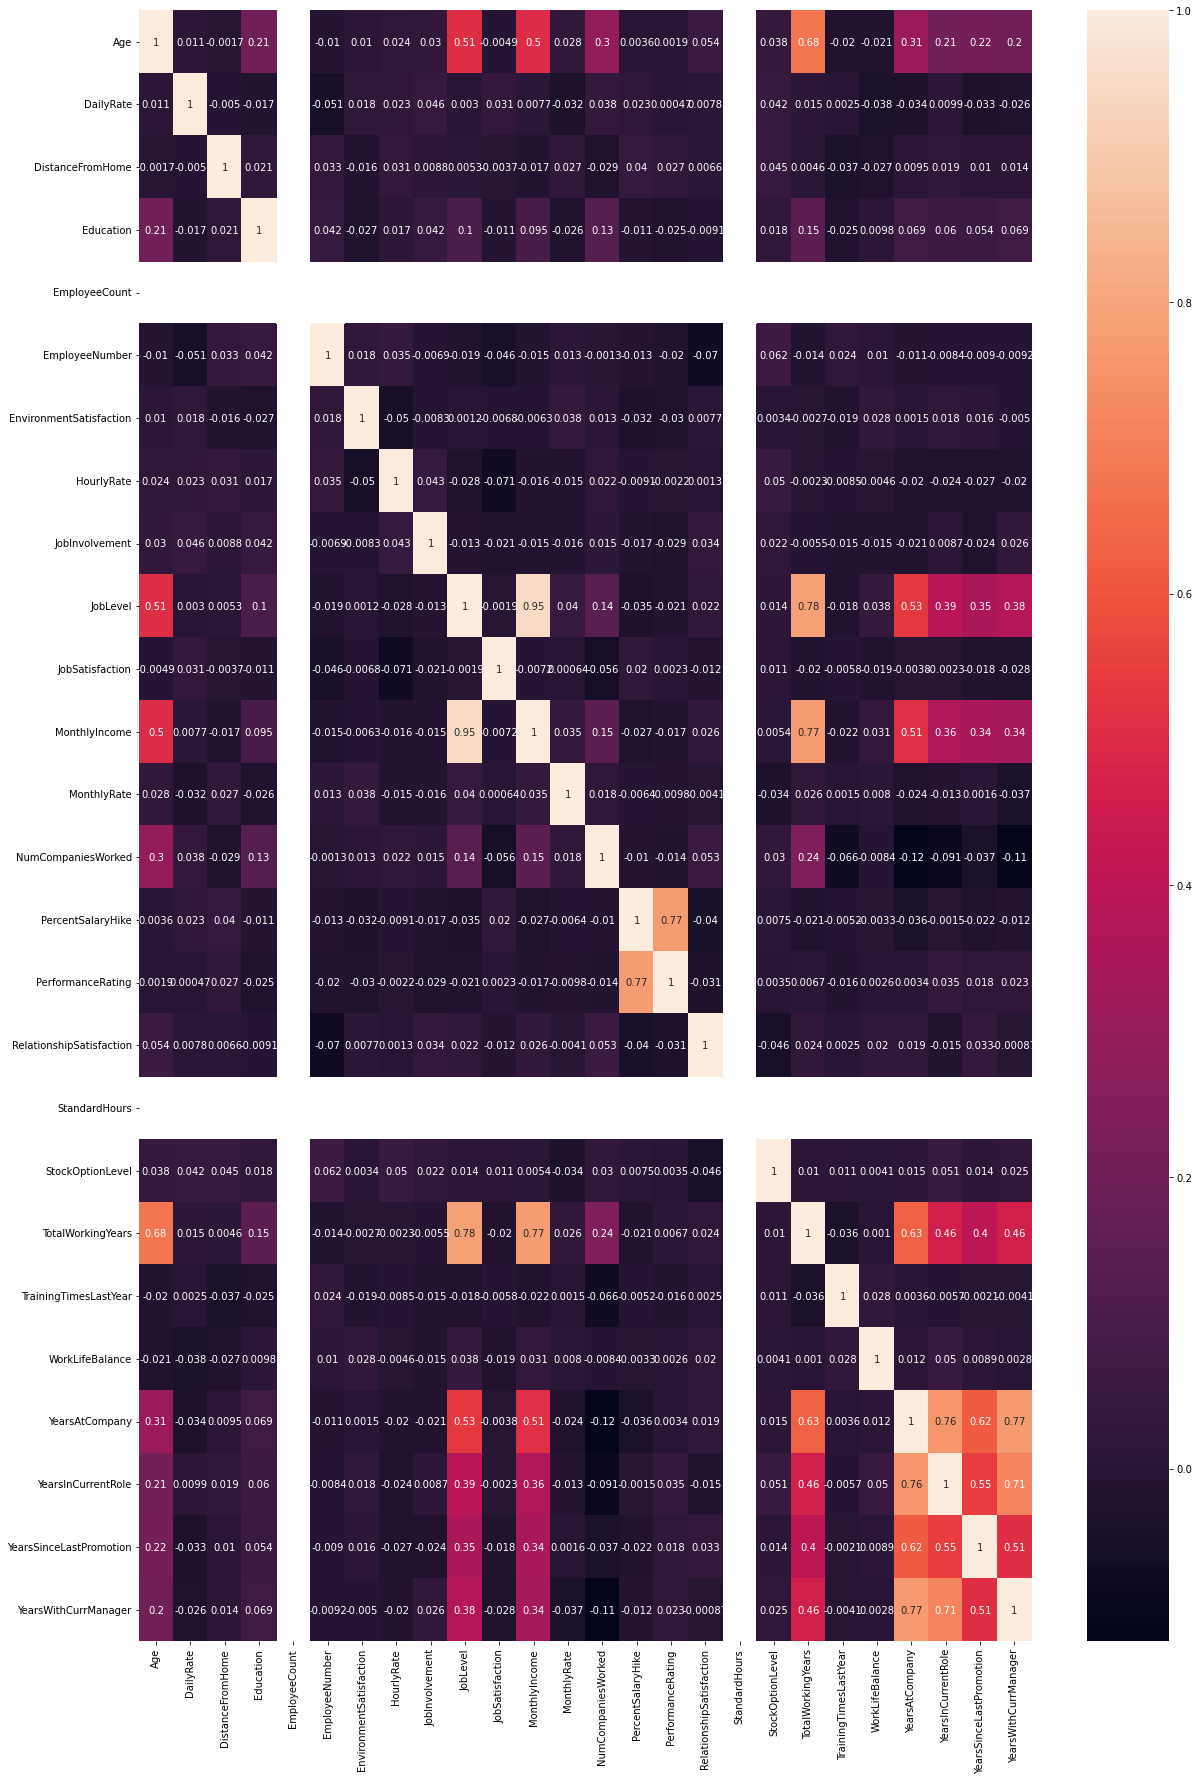

In [146]:
plt.figure(figsize=(20,30))
sns.heatmap(continous.corr(),annot=True)

In [147]:
#determining the cardinality of the categorical data for encoding
for i in categorical.columns:
    print(i,"Unique values: ",categorical[i].nunique())

Attrition Unique values:  2
BusinessTravel Unique values:  3
Department Unique values:  3
EducationField Unique values:  6
Gender Unique values:  2
JobRole Unique values:  9
MaritalStatus Unique values:  3
Over18 Unique values:  1
OverTime Unique values:  2


In [148]:
categorical['Over18'].unique()

array(['Y'], dtype=object)

In [149]:
#since all the employees are over 18years in the over18 column 
df.drop('Over18',axis=1,inplace=True)
categorical.drop('Over18',axis=1,inplace=True)

ENCODING THE CATEGORICAL DATA

In [150]:
categorical['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [151]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
list=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
for i in categorical.columns:
    
    df[i]=le.fit_transform(df[i])


In [152]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [153]:
for i in continous.columns:
    print(i," unique values: ",continous[i].nunique())

Age  unique values:  43
DailyRate  unique values:  886
DistanceFromHome  unique values:  29
Education  unique values:  5
EmployeeCount  unique values:  1
EmployeeNumber  unique values:  1470
EnvironmentSatisfaction  unique values:  4
HourlyRate  unique values:  71
JobInvolvement  unique values:  4
JobLevel  unique values:  5
JobSatisfaction  unique values:  4
MonthlyIncome  unique values:  1349
MonthlyRate  unique values:  1427
NumCompaniesWorked  unique values:  10
PercentSalaryHike  unique values:  15
PerformanceRating  unique values:  2
RelationshipSatisfaction  unique values:  4
StandardHours  unique values:  1
StockOptionLevel  unique values:  4
TotalWorkingYears  unique values:  40
TrainingTimesLastYear  unique values:  7
WorkLifeBalance  unique values:  4
YearsAtCompany  unique values:  37
YearsInCurrentRole  unique values:  19
YearsSinceLastPromotion  unique values:  16
YearsWithCurrManager  unique values:  18


Since employee count and the standard hours are the same for all the employees,we can drop them

In [154]:
df.drop('StandardHours',axis=1,inplace=True)

In [155]:
df.drop('EmployeeCount',axis=1,inplace=True)

In [156]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


In [157]:
continous.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [158]:
continous.drop('StandardHours',axis=1,inplace=True)
continous.drop('EmployeeCount',axis=1,inplace=True)

In [233]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(x)
sc_scale=sc.transform(x)


spca=pd.DataFrame(data=sc_scale,columns=x.columns)
spca.shape

(1470, 31)

PROCEEDING TO THE MODEL SELECTION AND TRAINING/TESTING PART(MACHINE LEARNING)

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [201]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']
y.shape

(1470,)

In [202]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

LOGISTIC REGRESSION MODEL

In [203]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_lg=lg.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_lg))
print("confusion matrix:",confusion_matrix(y_test,pred_lg))
print("classification report:",classification_report(y_test,pred_lg))
print("auc-roc score:",roc_auc_score(y_test,pred_lg))


accuracy_score: 0.8722826086956522
confusion matrix: [[320   0]
 [ 47   1]]
classification report:               precision    recall  f1-score   support

           0       0.87      1.00      0.93       320
           1       1.00      0.02      0.04        48

    accuracy                           0.87       368
   macro avg       0.94      0.51      0.49       368
weighted avg       0.89      0.87      0.82       368

auc-roc score: 0.5104166666666666


DECISION TREE CLASSIFIER

In [204]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_dtc))
print("confusion matrix:",confusion_matrix(y_test,pred_dtc))
print("classification report:",classification_report(y_test,pred_dtc))
print("auc-roc score:",roc_auc_score(y_test,pred_dtc))


accuracy_score: 0.7880434782608695
confusion matrix: [[276  44]
 [ 34  14]]
classification report:               precision    recall  f1-score   support

           0       0.89      0.86      0.88       320
           1       0.24      0.29      0.26        48

    accuracy                           0.79       368
   macro avg       0.57      0.58      0.57       368
weighted avg       0.81      0.79      0.80       368

auc-roc score: 0.5770833333333334


SUPPORT VECTOR MACHINE

In [210]:
svc2=SVC()
svc2.fit(x_train,y_train)
pred_svc2=svc2.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_svc2))
print("confusion matrix:",confusion_matrix(y_test,pred_svc2))
print("classification report:",classification_report(y_test,pred_svc2))
print("auc-roc score:",roc_auc_score(y_test,pred_svc2))


accuracy_score: 0.8695652173913043
confusion matrix: [[320   0]
 [ 48   0]]
classification report:               precision    recall  f1-score   support

           0       0.87      1.00      0.93       320
           1       0.00      0.00      0.00        48

    accuracy                           0.87       368
   macro avg       0.43      0.50      0.47       368
weighted avg       0.76      0.87      0.81       368

auc-roc score: 0.5


RANDOM FOREST CLASSIFIER

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_dtc))
print("confusion matrix:",confusion_matrix(y_test,pred_dtc))
print("classification report:",classification_report(y_test,pred_dtc))
print("auc-roc score:",roc_auc_score(y_test,pred_dtc))


accuracy_score: 0.8016304347826086
confusion matrix: [[280  40]
 [ 33  15]]
classification report:               precision    recall  f1-score   support

           0       0.89      0.88      0.88       320
           1       0.27      0.31      0.29        48

    accuracy                           0.80       368
   macro avg       0.58      0.59      0.59       368
weighted avg       0.81      0.80      0.81       368

auc-roc score: 0.59375


KNEIGHBORS CLASSIFIER

In [234]:
x2=spca
y2=df['Attrition']
x2.shape

(1470, 31)

In [235]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=.25,random_state=42)

In [227]:
from sklearn.neighbors import KNeighborsClassifier

In [251]:
knc=KNeighborsClassifier(n_neighbors=9)
knc.fit(x_train,y_train)
pred_knc=knc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_knc))
print("confusion matrix:",confusion_matrix(y_test,pred_knc))
print("classification report:",classification_report(y_test,pred_knc))
print("auc-roc score:",roc_auc_score(y_test,pred_knc))


accuracy_score: 0.8858695652173914
confusion matrix: [[319   1]
 [ 41   7]]
classification report:               precision    recall  f1-score   support

           0       0.89      1.00      0.94       320
           1       0.88      0.15      0.25        48

    accuracy                           0.89       368
   macro avg       0.88      0.57      0.59       368
weighted avg       0.88      0.89      0.85       368

auc-roc score: 0.5713541666666666


THE KNEIGBORS CLASSIFIER PERFORMED THE BEST IN TERMS OF ACCURACY SCORE(88.9%)

Proceeding to saving the model

In [253]:
import pickle
filename='employee_attrition(knn).sav'
pickle.dump(knc,open(filename,'wb'))

loading the model again

In [254]:
load_model=pickle.load(open(filename,'rb'))
result=load_model.score(x_train,y_train)
result

0.8502722323049002